In [1]:
import numpy as np
import pandas as pd
import datetime as dt

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

import sys

import fastparquet
import snappy

In [2]:
def showall(df):
    #shows entire dataframe
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        display(df)

In [3]:
alldays_timestamped = pd.read_parquet('alldays_timestamped.parquet')

/Users/edasmalchi/anaconda3/envs/ox/lib/python3.7/site-packages/fastparquet/core.py:278: UserWarning: Non-categorical multi-index is likely brittle
  warnings.warn("Non-categorical multi-index is likely brittle")
/Users/edasmalchi/anaconda3/envs/ox/lib/python3.7/site-packages/fastparquet/core.py:278: UserWarning: Non-categorical multi-index is likely brittle
  warnings.warn("Non-categorical multi-index is likely brittle")


In [8]:
alldays_timestamped.xs('2019-09-01 18:31:48', level='Timestamp', drop_level=False)

Begin Date  Begin Time    End Time  \
Timestamp           Vehicle_Location                                           
2019-09-01 18:31:48 Space 3               09/01/2019  5:00:00 PM  6:32:42 PM   
                    Space 1               09/01/2019  6:16:07 PM  9:59:08 PM   
                    Space 2               09/01/2019  6:23:41 PM  7:43:29 PM   
                    NB right turn pocket  09/01/2019  6:28:52 PM  6:31:53 PM   
                    SB bike lane          09/01/2019  6:31:10 PM  6:33:20 PM   

                                              Vehicle Location Vehicle Type  \
Timestamp           Vehicle_Location                                          
2019-09-01 18:31:48 Space 3                            Space 3          Car   
                    Space 1                            Space 1          Car   
                    Space 2                            Space 2          Car   
                    NB right turn pocket  NB right turn pocket          Car   
                    SB bike lane                  SB bike lane          Car   

                                         Vehicle Characteristics  \
Timestamp           Vehicle_Location                               
2019-09-01 18:31:48 Space 3                                 None   
                    Space 1                                 None   
                    Space 2                                 None   
                    NB right turn pocket                    None   
                    SB bike lane                     Blinkers on   

                                                Transaction Characteristics  \
Timestamp           Vehicle_Location                                          
2019-09-01 18:31:48 Space 3                                            None   
                    Space 1                  Interaction with parking meter   
                    Space 2               No interaction with parking meter   
                    NB right turn pocket                               None   
                    SB bike lane                                       None   

                                          Bikeway Users Displaced  \
Timestamp           Vehicle_Location                                
2019-09-01 18:31:48 Space 3                                   NaN   
                    Space 1                                   NaN   
                    Space 2                                   NaN   
                    NB right turn pocket                      NaN   
                    SB bike lane                              6.0   

                                          LZ Space Avail  \
Timestamp           Vehicle_Location                       
2019-09-01 18:31:48 Space 3                          NaN   
                    Space 1                          NaN   
                    Space 2                          NaN   
                    NB right turn pocket             0.0   
                    SB bike lane                     0.0   

                                          Occupied while idle?  CNS?   TNC?  \
Timestamp           Vehicle_Location                                          
2019-09-01 18:31:48 Space 3                              False   0.0  False   
                    Space 1                              False   0.0  False   
                    Space 2                              False   0.0  False   
                    NB right turn pocket                 False   1.0  False   
                    SB bike lane                          True   0.0  False   

                                                                                  Notes  \
Timestamp           Vehicle_Location                                                      
2019-09-01 18:31:48 Space 3                                                        None   
                    Space 1               looked at the meter but still decided to park   
                    Space 2                                              

In [9]:
violator_color_dict = {True:'r', False:'b'}

In [10]:
singlespc_df = alldays_timestamped.xs('Space 2', level='Vehicle_Location', drop_level=True)
singlespc_df = singlespc_df.copy()

In [11]:
singlespc_df['vcolor'] = singlespc_df['Violator'].apply(lambda x: violator_color_dict[x])

In [12]:
singlespc_df[singlespc_df['Violator'] == True]

,Begin Date,Begin Time,End Time,Vehicle Location,Vehicle Type,Vehicle Characteristics,Transaction Characteristics,Bikeway Users Displaced,LZ Space Avail,Occupied while idle?,CNS?,TNC?,Notes,Duration,Violator,vcolor
Timestamp,,,,,,,,,,,,,,,,
2019-08-21 18:10:27,08/21/2019,6:10:27 PM,6:50:16 PM,Space 2,Car,Blinkers on,No interaction with parking meter,NaN,NaN,False,0.0,False,None,0:39:49,True,r
2019-08-21 18:10:28,08/21/2019,6:10:27 PM,6:50:16 PM,Space 2,Car,Blinkers on,No interaction with parking meter,NaN,NaN,False,0.0,False,None,0:39:49,True,r
2019-08-21 18:10:29,08/21/2019,6:10:27 PM,6:50:16 PM,Space 2,Car,Blinkers on,No interaction with parking meter,NaN,NaN,False,0.0,False,None,0:39:49,True,r
2019-08-21 18:10:30,08/21/2019,6:10:27 PM,6:50:16 PM,Space 2,Car,Blinkers on,No interaction with parking meter,NaN,NaN,False,0.0,False,None,0:39:49,True,r
2019-08-21 18:10:31,08/21/2019,6:10:27 PM,6:50:16 PM,Space 2,Car,Blinkers on,No interaction with parking meter,NaN,NaN,False,0.0,False,None,0:39:49,True,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-04 22:14:44,09/04/2019,9:47:01 PM,10:14:48 PM,Space 2,Car,None,No interaction with parking meter,NaN,NaN,False,1.0,False,None,0:27:47,True,r
2019-09-04 22:14:45,09/04/2019,9:47:01 PM,10:14:48 PM,Space 2,Car,None,No interaction with parking meter,NaN,NaN,False,1.0,False,None,0:27:47,True,r
2019-09-04 22:14:46,09/04/2019,9:47:01 PM,10:14:48 PM,Space 2,Car,None,No interaction with parking meter,NaN,NaN,False,1.0,False,None,0:27:47,True,r


In [13]:
def plot_space_occ(timestamped_df, space_name, y_val=1):
    
    times = [timestamped_df.index[1][0], timestamped_df.index[-1][0]]
    
    singlespc_df = timestamped_df.xs(space_name, level='Vehicle_Location', drop_level=True)
    singlespc_df = singlespc_df.copy()
    
    singlespc_df['in_loc'] = y_val
    
    violator_color_dict = {True:'r.', False:'b.'}
    #singlespc_df['vcolor'] = singlespc_df['Violator'].apply(lambda x: violator_color_dict[x])
    
    plotdf = singlespc_df[['in_loc', 'Violator']]
    axes = []
    for key in (False, True):
        plotdf = singlespc_df[['in_loc', 'Violator']]
        plotdf = plotdf[plotdf['Violator'] == key]
        try:
            ax = plotdf.plot(yticks=[0,1],ylim=[1.05,1.6],xlim=times ,style={
                'in_loc': violator_color_dict[key]}, figsize=(20, 3))
            print(type(ax))
        except:
            continue
        axes += [ax]
    return axes

In [14]:
def plot_day_occ(timestamped_df):
    y_val = 1.5
    spaces = timestamped_df['Vehicle Location'].unique()
    spaces.sort()
    day_axes = []
    for space in spaces:
        y_val -= .05
        print(space)
        axes = plot_space_occ(timestamped_df, space, y_val=y_val)
        day_axes += axes
    return day_axes
    #plt.show()

Both/Middle of Space 1 & 2
<class 'matplotlib.axes._subplots.AxesSubplot'>
NB right turn pocket
<class 'matplotlib.axes._subplots.AxesSubplot'>
SB bike lane
<class 'matplotlib.axes._subplots.AxesSubplot'>
Space 1
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
Space 2
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
Space 3
<class 'matplotlib.axes._subplots.AxesSubplot'>


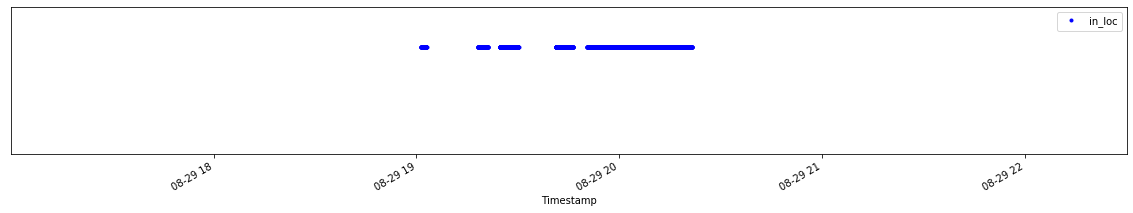

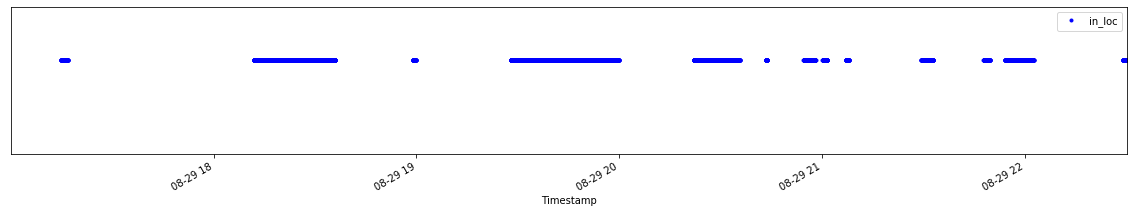

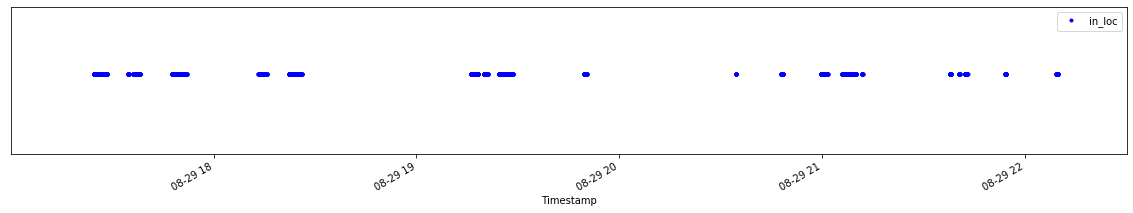

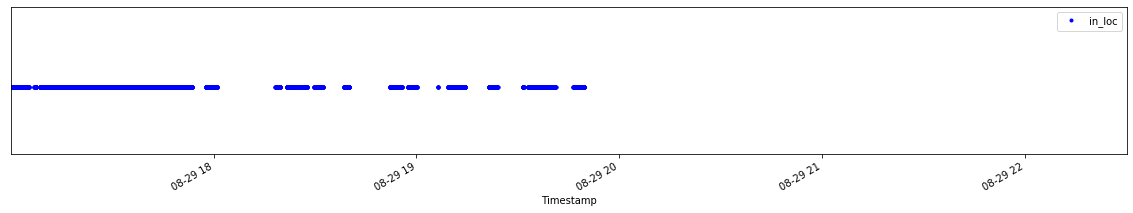

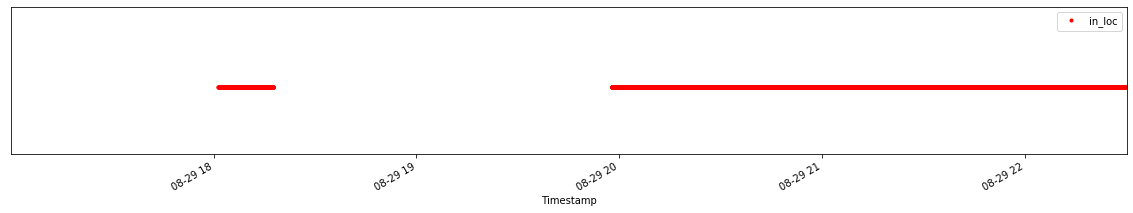

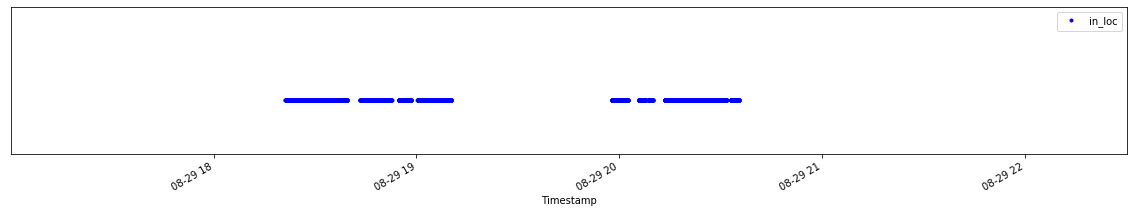

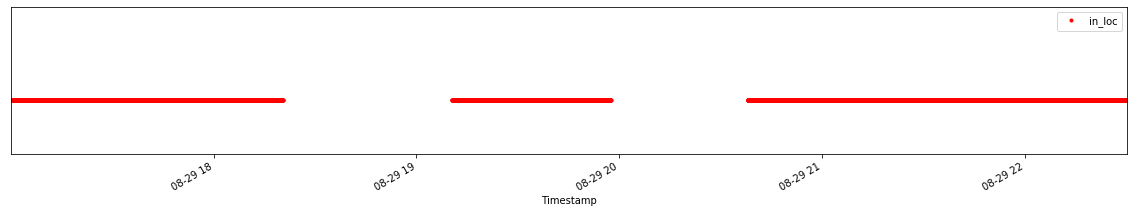

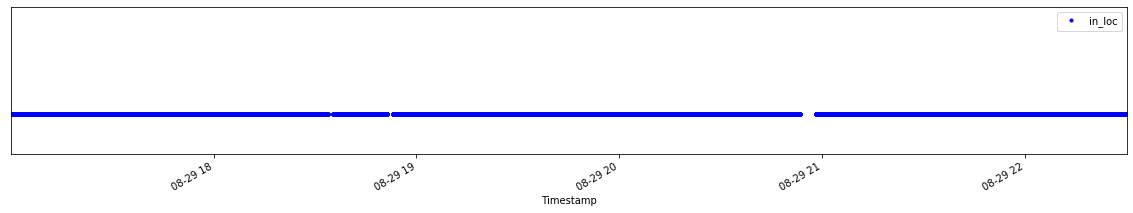

In [15]:
axes = plot_day_occ(alldays_timestamped[alldays_timestamped['Begin Date'] == '08/29/2019'])

In [122]:
axes

In [ ]:
ax=axes[0]
for axis in axes

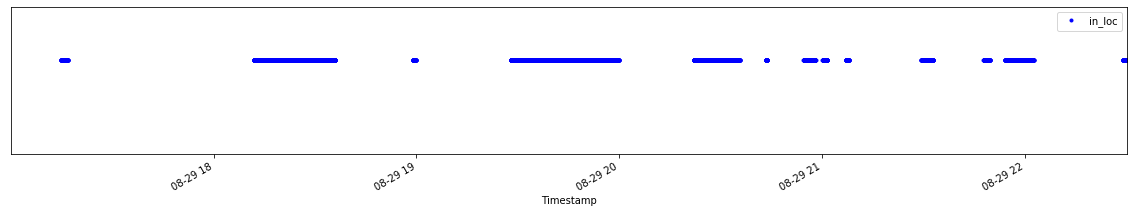

In [126]:
axes[1].figure

In [16]:
plt.show()